# Import Libraries

In [1]:
import glob
import time
import timeit
import pickle
import requests
import json
import re
import numpy as np
import pandas as pd
from multiprocessing import Pool
from matplotlib import pyplot as plt
from zipfile import ZipFile
import lxml.etree as etree
import xmlschema
from pprint import pprint
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from itertools import combinations
from matplotlib.patches import Patch
import distinctipy

# If 'get_career' is a custom module you've created, keep this import

# Define 'toc' function once
def toc(start_time):
    elapsed = timeit.default_timer() - start_time
    print(elapsed)

# Record start time
start_time = timeit.default_timer()
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.gridspec as gridspec

import math
import requests
from bs4 import BeautifulSoup
import matplotlib as mpl
import seaborn as sns
import matplotlib.cm as cm
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.transforms as mtransforms
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set_context('talk')#, font_scale=1.5)
mpl.rcParams.update({'text.usetex': False})
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
path_career='/mnt/sdb1/sandeep/000game_dev/'


# GB_INLCUDED_OR_NOT='GB_NOT_INCLUDED'

In [45]:
# Initialize a list to hold game details
game_links=[]
pagelist=[x for x in range(5)]+[x for x in range(10,15)]+[x for x in range(30,35)]
for page in pagelist:
    print(page,end='\r')
    # URL of the page to scrape
    url = "https://www.mobygames.com/game/platform:windows/sort:moby_score/page:"+str(page)+"/"
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
    else:
        print(f"Failed to retrieve the webpage. Status code: {response.status_code}")
    link_start='https://www.mobygames.com/game/'
    import re
    X=str(response.content)
    res = [i for i in range(len(X)) if X.startswith(link_start, i)]
    for it in range(7,18+7):
        game_links.append(X[res[it]:res[it]+200].split(',')[0][0:-1])
game_links=np.unique(game_links)

In [46]:
# len(res)
# game_links=[]

# for it in range(0,len(res)):
#     game_links.append(X[res[it]:res[it]+200].split(',')[0][0:-1])
len(game_links)

162

# Parallel scraping


In [47]:
import requests
from bs4 import BeautifulSoup
from concurrent.futures import ThreadPoolExecutor, as_completed

def fetch_and_parse(url):
    """
    Fetches the content of the given URL and parses it with BeautifulSoup.
    Returns a BeautifulSoup object or None if the request fails.
    """
    response = requests.get(url)
    if response.status_code == 200:
        return BeautifulSoup(response.content, 'html.parser')
    else:
        print(f"Failed to retrieve the webpage. Status code: {response.status_code}")
        return None



# download credits of game

In [ ]:
# # ########################################################## 
# # ##download number of games on which people were credited
# # ##########################################################

# def downloadCredits(url):
# # URL of the page to scrape
#     # Send a request to the URL
#     response = requests.get(url)

#     # Check if the request was successful
#     if response.status_code == 200:
#         # Parse the content of the page
#         soup = BeautifulSoup(response.content, 'html.parser')
#     else:
#         print(f"Failed to retrieve the webpage. Status code: {response.status_code}")
#     return soup

# it=0
# dictSoup={}
# for url_ in game_links:
#     it+=1;print(it/len(game_links),end='\r')
#     url=url_+'credits/windows/'
#     soup,hrefs,roles=   downloadCredits(url)
#     dictSoup[url.split('/')[-4]]=soup
#     dictRoles[url.split('/')[-4]]=[hrefs,roles,url]

In [109]:
from concurrent.futures import ThreadPoolExecutor, as_completed
import time

total_urls = len(game_links)
processed_urls = 0
gamesoup_dict = {}  # Dictionary to store game link and corresponding soup

# Function to fetch and parse the content of the URL
def fetch_and_parse_url(url):
    """
    Fetches the content of the given URL and parses it with BeautifulSoup.
    Returns a BeautifulSoup object or None if the request fails.
    """
    response = requests.get(url)
    if response.status_code == 200:
        return url,BeautifulSoup(response.content, 'html.parser')
    else:
        print(f"Failed to retrieve the webpage. Status code: {response.status_code}")
        return None

# Function to process a batch of URLs
def process_batch(urls):
    global processed_urls
    with ThreadPoolExecutor(max_workers=5) as executor:
        future_to_url = {executor.submit(fetch_and_parse_url, url+'credits/windows/'): url for url in urls}

        for future in as_completed(future_to_url):
            url, soup = future.result()
            processed_urls += 1
            if soup:
                gamesoup_dict[url] = soup  # Store in dictionary with URL as key
            print(f"Processed {processed_urls}/{total_urls} URLs", end='\r')

# Split game_links into smaller lists of 50 links
batch_size = 50
game_links_batches = [game_links[i:i + batch_size] for i in range(0, len(game_links), batch_size)]

# Process each batch sequentially
for batch in game_links_batches:
    process_batch(batch)
    time.sleep(5)  # Wait for 5 seconds before processing the next batch


# save collected credits of the games

In [110]:
# gamesoup_str=[str(x) for x in gamesoup]
# with open(path_career+'gamesoup_str.pkl', 'wb') as f:
#     pickle.dump(gamesoup_str, f)

In [6]:
# with open(path_career+'gamesoup_str.pkl', 'rb') as f:
#     gamesoup_str=pickle.load(f)
# gamesoup = [BeautifulSoup(html_string, 'html.parser') for html_string in gamesoup_str  ]


In [127]:
from concurrent.futures import ThreadPoolExecutor, as_completed

# def process_soup(it, gamesoup, game_links):
#     soup = gamesoup[it]
#     game = game_links[it]
#     td_elements = soup.find_all('td')
#     loc_td = []
#     hrefs = []
#     roles = []
#     for td_element in td_elements:
#         a_tags = td_element.find_all('a')
#         link_start = str(td_element)
# #         loc_td.append([i for i in range(len(X)) if X.startswith(link_start, i)])
#         hrefs.append([a.get('href') for a in a_tags])
#         roles.append(td_element.get_text().strip())
#     return game, [roles, hrefs]
def SouptoRoles(gamesoup_dict, game_links):
    game_to_priorlinks={}
    RolesAndPeople={}
    for it in range(len(gamesoup_dict)):
        print(it/len(gamesoup_dict),end='\r')
        game,soup = list(gamesoup_dict.items())[it]

        # td_elements = soup.find_all('td')
# # Find all <a> tags within this <td> element
# hrefs=[];roles=[]
# for td_element in td_elements:
#     a_tags = td_element.find_all('a')

# # Extract the hrefs from each <a> tag
#     hrefs.append([a.get('href') for a in a_tags])
#     roles.append(td_element.get_text().strip())

        td_elements = soup.find_all('td')
        hrefs = []
        roles = []

        for td_element in td_elements:
            # Extract 'a' tags, assuming they are direct children of 'td' elements
            a_tags = td_element.find_all('a')
            # Extract href attributes
            hrefs.append([a.get('href') for a in a_tags])
            # Extract text directly
            roles.append(td_element.get_text(strip=True))
        game_to_priorlinks[game]=[roles, hrefs]
        
        RolesAndPeople[game]={r:h for r,h in zip(roles[0::2],hrefs[1::2])}

    return game_to_priorlinks,RolesAndPeople

game_to_priorlinks,RolesAndPeople=SouptoRoles(gamesoup_dict, game_links)

In [121]:
it=5
game,soup = list(gamesoup_dict.items())[it]
game

'https://www.mobygames.com/game/117263/gris/credits/windows/'

In [115]:
# game_to_priorlinks

# download prior collabs
small teams only


In [ ]:

list(game_to_priorlinks.items())[5]

In [141]:
teamsizes={}
for game,Roles in RolesAndPeople.items():
#     print()
    roles=list(Roles.values())
    if len(roles)>0:
        members=np.concatenate(roles)
    else:
        members=[]
    teamsizes[game]=len(members)
    print(game, len(members))
#     hrefs=hrefs[1::2]
#     teamsize=len(hrefs)
# #     if teamsize<200 and teamsize>0:
#     if teamsize<1000 and teamsize>0:
#     #     print(x[1][1])
#         print(x[0],teamsize)

#         roles=x[1][1]
#         hrefs=x[1][0] 
#         hrefs=hrefs[1::2]
#     #     voice = [i for i in range(len(X)) if 'voice act' in X[i].lower()]
# #         notQAorVoice = [0 if ('qa' in X[i].lower() or 'voice act' in X[i].lower()) else 1 for i in range(len(X)) ]
# #         RolesAndPeople={r:h for r,h in zip(roles[0::2],hrefs[1::2])}

# #     print([X[i] for i in res])
# #     print([X[i] for i in QA])
    
#     break

https://www.mobygames.com/game/101077/dusk/credits/windows/ 67
https://www.mobygames.com/game/1126/star-wars-x-wing-alliance/credits/windows/ 202
https://www.mobygames.com/game/112739/baba-is-you/credits/windows/ 73
https://www.mobygames.com/game/101142/celeste/credits/windows/ 76
https://www.mobygames.com/game/10153/tron-20/credits/windows/ 345
https://www.mobygames.com/game/117263/gris/credits/windows/ 100
https://www.mobygames.com/game/115348/return-of-the-obra-dinn/credits/windows/ 82
https://www.mobygames.com/game/116781/hitman-2/credits/windows/ 842
https://www.mobygames.com/game/1188/fifa-99/credits/windows/ 244
https://www.mobygames.com/game/122190/hades/credits/windows/ 193
https://www.mobygames.com/game/115902/red-dead-redemption-ii/credits/windows/ 4615
https://www.mobygames.com/game/1261/thief-ii-the-metal-age/credits/windows/ 143
https://www.mobygames.com/game/123968/tom-clancys-the-division-2/credits/windows/ 2904
https://www.mobygames.com/game/136147/marvel-spider-man-ga

In [115]:
np.sum(notQAorVoice)
TeamSizes={}
for k in dictRoles.keys():
    if len(dictRoles[k][0])>0:
        TeamSizes[k]=len(np.concatenate(dictRoles[k][0]))
    else:
        TeamSizes[k]=0

In [119]:
ts=np.array(list(TeamSizes.values()))
games=np.array(list(TeamSizes.keys()))

## download prior credits  

In [ ]:
creditlinks = np.concatenate(hrefs[1::2])
total_urls = len(creditlinks)
processed_urls = 0
soup_credits = []

# Function to process a batch of URLs
def process_batch(urls):
    global processed_urls
    with ThreadPoolExecutor(max_workers=5) as executor:
        future_to_url = {executor.submit(fetch_and_parse, url): url for url in urls}

        for future in as_completed(future_to_url):
            soup = future.result()
            processed_urls += 1
            if soup:
                soup_credits.append(soup)
            print(f"Processed {processed_urls}/{total_urls} URLs", end='\r')

# Split creditlinks into smaller lists of 50 links
batch_size = 50
creditlink_batches = [creditlinks[i:i + batch_size] for i in range(0, len(creditlinks), batch_size)]

# Process each batch sequentially
for batch in creditlink_batches:
    process_batch(batch)
    time.sleep(5)  # Wait for 3 seconds before retrying


In [110]:
print([len(np.concatenate(dictRoles[k])) for k in dictRoles.keys()])


<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[5336, 68, 0, 3412, 4296, 396, 660, 84, 564, 1936, 1020, 1980, 576, 252, 532, 404, 1296, 2636, 1860, 116, 320, 96, 1684, 572, 996, 640, 784, 92, 7220, 1780, 132, 2100, 2164, 852, 0, 584, 640, 620, 1380, 196, 216, 96, 0, 328, 308, 584, 36, 828, 0, 708, 324, 108, 536, 1156, 204, 3400, 0, 336, 1092, 296, 972, 40, 36, 796, 452, 268, 512, 1424, 340, 388, 136, 600, 92, 48, 108, 84, 2140, 972, 276, 1700, 0, 472, 136, 88, 940, 488, 60, 0, 740, 96]


In [77]:
len(np.unique(np.concatenate(list(RolesAndPeople.values()))))


1437

In [82]:
game_links[3]

'https://www.mobygames.com/game/174989/elden-ring/'

In [93]:
########################################################## 
##download number of games on which people were credited
##########################################################

# URL of the page to scrape
url=game_links[3]+'credits/windows/'
# Send a request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the content of the page
    soup = BeautifulSoup(response.content, 'html.parser')
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")


td_elements = soup.find_all('td')
th_elements = soup.find_all('th')
# Find all <a> tags within this <td> element
hrefs=[];roles=[]
for td_element in td_elements:
    a_tags = td_element.find_all('a')
# Extract the hrefs from each <a> tag
    hrefs.append([a.get('href') for a in a_tags])
    roles.append(td_element.get_text().strip())
# for th_elements in th_elements:
#     a_tags = th_elements.find_all('a')
#     hrefs_sections.append([a.get('href') for a in a_tags])





In [96]:

url

'https://www.mobygames.com/game/174989/elden-ring/credits/windows/'

# Get departments in credits of the game
- To remove Voice acting, etc, 
- also other studios manually later, 
- construct a list of departments which make sense and 
- automatically assign scores of similarity for each discovered department and then filter

In [173]:
id_=7
print(list(dictSoup.keys())[id_])
soup= dictSoup[list(dictSoup.keys())[id_]]
th_elements = soup.find_all('th')

print(game_links[id_])
X=str(soup)
loc_th=[]
for x in th_elements:
    link_start=str(x) 
    loc_th.append([i for i in range(len(X)) if X.startswith(link_start, i)])

td_elements = soup.find_all('td')
loc_td=[]
hrefs=[];roles=[]
for td_element in td_elements:
    a_tags = td_element.find_all('a')
    link_start=str(td_element) 
    loc_td.append([i for i in range(len(X)) if X.startswith(link_start, i)])
    hrefs.append([a.get('href') for a in a_tags])
    roles.append(td_element.get_text().strip())

half-life-alyx
https://www.mobygames.com/game/143668/half-life-alyx/


In [174]:
def find_bin(value, bins):
    """
    Find the appropriate bin for the given value using binary search.
    """
    low, high = 0, len(bins) - 1
    while low < high:
        mid = (low + high) // 2
        if value > bins[mid]:
            low = mid + 1
        else:
            high = mid
    return bins[low]

def assign_bins(L, bins):
    """
    Assign each value in L to the appropriate bin.
    """
    bin_assignment = {}
    for value in L:
        bin_assigned = find_bin(value, bins)
        bin_assignment[value] = bin_assigned
    return bin_assignment

# Example usage
loc_td =[x[0] for x in loc_td]
loc_th=np.concatenate(loc_th)
loc_th=list(loc_th)
loc_th.append(max(loc_td)+1)
bin_assignment = assign_bins(loc_td, loc_th)
print(bin_assignment)


{10078: 74208, 10137: 74208, 67106: 74208, 67163: 74208, 67416: 74208, 67492: 74208, 73913: 74208, 73988: 74208, 74283: 78896, 74347: 78896, 74567: 78896, 74634: 78896, 74866: 78896, 74927: 78896, 75138: 78896, 75203: 78896, 75411: 78896, 75470: 78896, 75696: 78896, 75759: 78896, 75976: 78896, 76034: 78896, 76248: 78896, 76307: 78896, 76521: 78896, 76794: 78896, 77077: 78896, 77140: 78896, 77356: 78896, 77428: 78896, 77673: 78896, 77740: 78896, 77972: 78896, 78041: 78896, 78270: 78896, 78339: 78896, 78559: 78896, 78624: 78896, 78835: 78896, 78895: 78896}


In [167]:
loc_th

array([ 10956,  63456, 109163, 110725, 137679, 144566, 149793, 155043,
       162447, 195809])

In [ ]:
loc_td

In [175]:
th_elements

[<th colspan="2"><h4 class="text-center mb-0">Half-Life: Alyx</h4></th>,
 <th colspan="2"><h4 class="text-center mb-0">The Cast</h4></th>]

In [8]:
hrefs=hrefs[0:257]
roles=roles[0:257]
RolesAndPeople={r:h for r,h in zip(roles[0::2],hrefs[1::2])}
# with open(path_career+'RolesAndPeople_'+url.split('/')[-4]+'.pkl', 'wb') as f:
#     pickle.dump(RolesAndPeople, f)

In [9]:
# NUMBER OF TEAM MEMBERS IN GAME DEV  TEAM
len(np.unique(np.concatenate(list(RolesAndPeople.values()))))


330

In [10]:
game_devs=np.unique(np.concatenate(list(RolesAndPeople.values())))

In [11]:
len(game_devs)



330

In [14]:
########################################################## 
##download number of games on which people were credited
##########################################################
hcredits=[];rcredits={}
# creditlinks[0]
for soup_credit,p in zip(soup_credits,creditlinks):
    td_elements = soup_credit.find_all('td')
    td_elements
    # Find all <a> tags within this <td> element
    hcredit=[];rcredit=[]
    for td_element in td_elements:
        a_tags = td_element.find_all('a')

    # Extract the hrefs from each <a> tag
        hcredit.append([a.get('href') for a in a_tags])
        rcredit.append(td_element.get_text().strip())
    hcredits.append(hcredit);rcredits[p]=(rcredit);
# roles[0:257]

# with open(path_career+'soup_credit_'+url.split('/')[-4]+'.pkl', 'wb') as f:
#     pickle.dump(soup_credit, f)

<ipython-input-15-a5b88ebac117>:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(x='prior experience in game dev (number of games)', data=df, palette=palette)


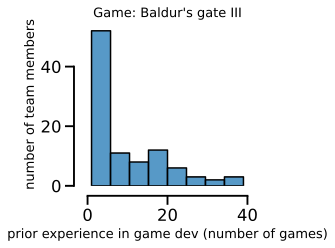

In [15]:
PriorWorkExp_=np.array([len(rcredits[x])-1 for x in rcredits.keys()])



df = pd.DataFrame(PriorWorkExp_)
df.columns=['prior experience in game dev (number of games)']
# Custom colors
 
# Creating the bar chart
ff = 13
aa=3; bb=3; wspace_=0.5; hspace_=0.3
fig = plt.figure(figsize=(aa, bb))
spec = gridspec.GridSpec(ncols=1, nrows=1, width_ratios=[1], wspace=wspace_, hspace=hspace_, height_ratios=[1])

# Figure
ax = fig.add_subplot(spec[0])
ax = sns.histplot(x='prior experience in game dev (number of games)', data=df, palette=palette)
plt.ylabel('number of team members', fontsize=ff)
plt.xlabel("prior experience in game dev (number of games)", fontsize=ff)
plt.title("Game: Baldur's gate III", fontsize=ff)
# plt.ylim(0, max(df['Percentage']) + 5)
sns.despine(offset=10, trim=True)

# Show the plot
# plt.savefig("Baldur's Gate Individual experience.svg",dpi=300, bbox_inches = "tight")
# plt.savefig("Baldur's Gate Individual experience.pdf",dpi=300, bbox_inches = "tight")

### Joint Experience

In [67]:


# Assuming you have the roles data structured as mentioned
roles_data = RolesAndPeople.copy()

# Reverse mappingfrom person to role
person_to_role = {}
for role, persons in roles_data.items():
    for person in persons:
        person_to_role[person] = role

# Create a list of unique roles
unique_roles = list(roles_data.keys())

# Assign a unique color to each role
colors = list(mcolors.CSS4_COLORS.values())  # Using CSS4 colors
# number of colours to generate
# generate N visually distinct colours
role_to_color = dict(zip(unique_roles, distinctipy.get_colors(len(unique_roles))))
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
# Reverse mapping from person to role and count roles
person_to_role = {}
role_counts = {}
for role, persons in roles_data.items():
    role_counts[role] = len(persons)
    for person in persons:
        person_to_role[person] = role

# Calculate inverse role frequencies for node sizes
max_count = max(role_counts.values())
role_to_size = {role: (100*max_count / count)**.5 for role, count in role_counts.items()}

def calculate_shared_credits(rcredits):
    # Extract unique credits for each member
    unique_credits = {k: set(v) for k, v in rcredits.items()}

    # Calculate shared credits
    shared_credits = {}
    for (member1, credits1), (member2, credits2) in combinations(unique_credits.items(), 2):
        shared = credits1.intersection(credits2)
        shared_credits[(member1, member2)] = len(shared)

    return shared_credits
shared_credits=calculate_shared_credits(rcredits)

def create_network(shared_credits):
    G = nx.Graph()

    # Add edges with weights
    for (member1, member2), weight in shared_credits.items():
        if weight > MIN_FILTER_COLLABS:  # Add an edge only if there are shared credits
            G.add_edge(member1, member2, weight=weight)

    return G


def build_and_plot_network(person_to_role, role_to_color):
    ff = 13
    aa=15; bb=15; wspace_=0.5; hspace_=0.3
    fig = plt.figure(figsize=(aa, bb))
    spec = gridspec.GridSpec(ncols=1, nrows=1, width_ratios=[1], wspace=wspace_, hspace=hspace_, height_ratios=[1])

    # Figure
    ax = fig.add_subplot(spec[0])
  

    # Build the network
#     G = nx.Graph()
    G = create_network(shared_credits)
    for person in person_to_role:
        G.add_node(person, role=person_to_role[person])
    nodes=list(G.nodes())
    for node in nodes:
        if node not in person_to_role.keys():
            G.remove_node(node)
    # Apply colors to nodes based on roles
    node_colors = [role_to_color[person_to_role[node]] for node in G.nodes()]
    noddesize = [role_to_size[person_to_role[node]] for node in G.nodes()]
    node_colorsdict = {node:role_to_color[person_to_role[node]] for node in G.nodes()}
        
    
    # Plot the network
    pos = nx.spring_layout(G, k=nodedistance, iterations=20)
#     nx.draw(G, pos, node_color=node_colors, with_labels=False, node_size=50, edge_color="gray")

    # Edges
    weights = [(G[u][v]['weight'])**.5 for u, v in G.edges()]
    nx.draw_networkx_edges(G, pos, alpha=0.1, width=weights)

    # Nodes
    nx.draw_networkx_nodes(G, pos, node_color=node_colors,alpha=.7,node_size=noddesize)    
    # Label roles at centroids
    role_positions = {role: np.mean([pos[node] for node in G if person_to_role[node] == role], axis=0) 
                      for role in roles_data.keys()}
    role_colors = {role: [node_colorsdict[node] for node in G if person_to_role[node] == role][0]
                      for role in roles_data.keys()}
    for role, position in role_positions.items():
        col=role_colors[role]
        plt.text(position[0], position[1], role, fontsize=4, ha='center', va='center',color=col)

        
    plt.title("Baldur's gate III: Who worked with who? \nPrior shared game dev experience network of members \n(colored by their role in Baldur's gate III dev team)", fontsize=ff)
    legend_handles = [Patch(color=role_to_color[role], label=role) for role in unique_roles]
    plt.legend(handles=legend_handles,bbox_to_anchor=[1,1,], loc='upper left', title='Roles', fontsize=ff-6,ncol=2)

#     plt.show()
    plt.axis('off')

# Build and plot the network
MIN_FILTER_COLLABS=2
nodedistance=.3
build_and_plot_network(person_to_role, role_to_color)

# plt.savefig("Baldur's Gate III Prior Collabs"+str(MIN_FILTER_COLLABS)+".svg",dpi=500, bbox_inches = "tight")
# plt.savefig("Baldur's Gate III Prior Collabs"+str(MIN_FILTER_COLLABS)+".pdf",dpi=500, bbox_inches = "tight")

KeyboardInterrupt: 